Keras에서는 모델 학습을 위해 fit() 함수를 사용한다. 

이 때, 리턴값으로 학습 이력(History) 정보를 리턴하고, 여기에는 다음과 같은 항목들이 포함되어 있다.

아래 항목들은 매 epoch 마다의 값들이 저장되어 있다.

-loss : 훈련 손실값

-acc : 훈련 정확도

-val_loss : 검증 손실값

-val_acc : 검증 정확도

## 모듈 import 부분

In [9]:
# 기본 import
import tensorflow 
import matplotlib.pyplot as plt
%matplotlib inline

# fashion-MNIST 데이터 import
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Keras MODEL 구축 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# Keras MODEL 시각화 import
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot 

# # 무시
# from jupyterthemes import jtplot 
# jtplot.style()

# Kernel 튕김 방지
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 데이터 불러오기 및 전처리 과정

In [10]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 클래스 갯수 
nb_classes = 10

# 데이터 전처리
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# training set & validate set 
X_val = X_train[50000:]
X_train = X_train[:50000]
Y_val = Y_train[50000:]
Y_train = Y_train[:50000]

print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

MNIST data loaded: train: 50000 test: 10000
X_train: (50000, 28, 28)
y_train: (60000,)
Y_train: (50000, 10)
X_val: (10000, 28, 28)
Y_val: (10000, 10)


# 모델 구성

In [11]:
model = Sequential()
# Dense
model.add(Dense(units=20, input_dim=28*28))
model.add(Activation('relu'))
model.add(Dense(units=50, input_dim=28*28))
model.add(Activation('relu'))
model.add(Dense(units=10, activation='softmax'))

# 모델 컴파일 -> loss function, optimizer 설정
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1050      
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 17,260
Trainable params: 17,260
Non-trainable params: 0
_________________________________________________________________
None


## 모델 학습

In [13]:
epochs = 5 # one epoch takes about 3 seconds
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 3) 
hist = model.fit(X_train.reshape((-1,28*28)), 
                          Y_train, 
                          epochs=epochs, 
                          batch_size=32,
                          callbacks=[early_stopping],
                          validation_data=(X_val.reshape((-1,28*28)), Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 4s 87us/step - loss: 0.9052 - acc: 0.6937 - val_loss: 0.6099 - val_acc: 0.7799
Epoch 2/5
50000/50000 [==============================] - 4s 78us/step - loss: 0.5543 - acc: 0.8073 - val_loss: 0.5382 - val_acc: 0.8150
Epoch 3/5
50000/50000 [==============================] - 4s 78us/step - loss: 0.4956 - acc: 0.8260 - val_loss: 0.4818 - val_acc: 0.8264
Epoch 4/5
50000/50000 [==============================] - 4s 76us/step - loss: 0.4653 - acc: 0.8388 - val_loss: 0.5099 - val_acc: 0.8192
Epoch 5/5
50000/50000 [==============================] - 4s 77us/step - loss: 0.4450 - acc: 0.8453 - val_loss: 0.4568 - val_acc: 0.8408


# History_Keras

In [18]:
# 4가지 값들 출력하기

print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

[0.905215750541687, 0.5543488029289245, 0.49557221295833587, 0.46528187041282654, 0.44501733845233915]
[0.6937, 0.80732, 0.826, 0.83882, 0.84532]
[0.6099221526145935, 0.5382364521980285, 0.4818442988395691, 0.5099319715499878, 0.45682310342788696]
[0.7799, 0.815, 0.8264, 0.8192, 0.8408]


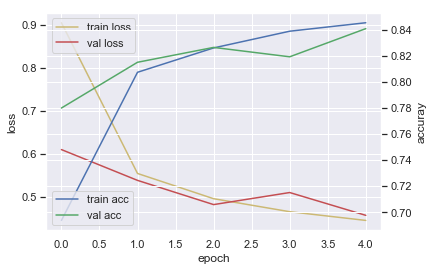

In [16]:
# 학습결과 확인하기

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()